In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
# Replace the path with the correct path for your data.
y2015 = pd.read_csv(
    '/Users/guest/Dropbox/Education/Thinkful/Unit 3 - Deeper into supervised learning/Lesson 2 - Decision Trees/Section 5 - Random forest - guided example/LoanStats3d.csv',
    skipinitialspace=True,
    header=1
)

# Note the warning about dtypes.

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (0,19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
y2015.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,68009401,72868139.0,16000.0,16000.0,16000.0,60 months,14.85%,379.39,C,C5,...,0.0,2.0,78.9,0.0,0.0,2.0,298100.0,31329.0,281300.0,13400.0
1,68354783,73244544.0,9600.0,9600.0,9600.0,36 months,7.49%,298.58,A,A4,...,0.0,2.0,100.0,66.7,0.0,0.0,88635.0,55387.0,12500.0,75635.0
2,68466916,73356753.0,25000.0,25000.0,25000.0,36 months,7.49%,777.55,A,A4,...,0.0,0.0,100.0,20.0,0.0,0.0,373572.0,68056.0,38400.0,82117.0
3,68466961,73356799.0,28000.0,28000.0,28000.0,36 months,6.49%,858.05,A,A2,...,0.0,0.0,91.7,22.2,0.0,0.0,304003.0,74920.0,41500.0,42503.0
4,68495092,73384866.0,8650.0,8650.0,8650.0,36 months,19.89%,320.99,E,E3,...,0.0,12.0,100.0,50.0,1.0,0.0,38998.0,18926.0,2750.0,18248.0


In [4]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

#rfc = ensemble.RandomForestClassifier()
X = y2015.drop('loan_status', 1)
Y = y2015['loan_status']
#X = pd.get_dummies(X)

#cross_val_score(rfc, X, Y, cv=5)

In [5]:
categorical = y2015.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print(i)
    print(column.nunique())

id
421097
term
2
int_rate
110
grade
7
sub_grade
35
emp_title
120812
emp_length
12
home_ownership
4
verification_status
3
issue_d
12
loan_status
7
pymnt_plan
1
url
421095
desc
34
purpose
14
title
27
zip_code
914
addr_state
49
earliest_cr_line
668
revol_util
1211
initial_list_status
2
last_pymnt_d
25
next_pymnt_d
4
last_credit_pull_d
26
application_type
2
verification_status_joint
3


In [6]:
# Convert ID and Interest Rate to numeric.
y2015['id'] = pd.to_numeric(y2015['id'], errors='coerce')
y2015['int_rate'] = pd.to_numeric(y2015['int_rate'].str.strip('%'), errors='coerce')

# Drop other columns with many unique variables
y2015.drop(['url', 'emp_title', 'zip_code', 'earliest_cr_line', 'revol_util',
            'sub_grade', 'addr_state', 'desc'], 1, inplace=True)

In [7]:
y2015.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
421092,36271333.0,38982739.0,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,5 years,...,0.0,3.0,100.0,50.0,1.0,0.0,51239.0,34178.0,10600.0,33239.0
421093,36490806.0,39222577.0,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,1 year,...,1.0,2.0,95.0,66.7,0.0,0.0,96919.0,58418.0,9700.0,69919.0
421094,36271262.0,38982659.0,20000.0,20000.0,20000.0,36 months,11.99,664.20,B,10+ years,...,0.0,1.0,100.0,50.0,0.0,1.0,43740.0,33307.0,41700.0,0.0
421095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Remove two summary rows at the end that don't actually contain data.
y2015 = y2015[:-2]

In [9]:
pd.get_dummies(y2015)
y2015.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,68009401.0,72868139.0,16000.0,16000.0,16000.0,60 months,14.85,379.39,C,10+ years,...,0.0,2.0,78.9,0.0,0.0,2.0,298100.0,31329.0,281300.0,13400.0
1,68354783.0,73244544.0,9600.0,9600.0,9600.0,36 months,7.49,298.58,A,8 years,...,0.0,2.0,100.0,66.7,0.0,0.0,88635.0,55387.0,12500.0,75635.0
2,68466916.0,73356753.0,25000.0,25000.0,25000.0,36 months,7.49,777.55,A,10+ years,...,0.0,0.0,100.0,20.0,0.0,0.0,373572.0,68056.0,38400.0,82117.0
3,68466961.0,73356799.0,28000.0,28000.0,28000.0,36 months,6.49,858.05,A,10+ years,...,0.0,0.0,91.7,22.2,0.0,0.0,304003.0,74920.0,41500.0,42503.0
4,68495092.0,73384866.0,8650.0,8650.0,8650.0,36 months,19.89,320.99,E,8 years,...,0.0,12.0,100.0,50.0,1.0,0.0,38998.0,18926.0,2750.0,18248.0


In [10]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

#rfc = ensemble.RandomForestClassifier()
X = y2015.drop('loan_status', 1)
Y = y2015['loan_status']
X = pd.get_dummies(X)
X = X.dropna(axis=1)

#cross_val_score(rfc, X, Y, cv=10)

<hr>
## DRILL: Third Attempt

So here's your task. Get rid of as much data as possible without dropping below an average of 90% accuracy in a 10-fold cross validation.

You'll want to do a few things in this process. First, dive into the data that we have and see which features are most important. This can be the raw features or the generated dummies. You may want to use PCA or correlation matrices.

Can you do it without using anything related to payment amount or outstanding principal? How do you know?
<hr>

###### Removing columns related to payment amount & outstanding principle
I'm going to start with low-hanging fruit – searching for columns that include the phrase "pymnt," ensuring that they're floats that plausibly describe dollar amounts, and then dropping them.

In [11]:
# Dig for payment-related columns
pd.options.display.max_columns
matching = [s for s in list(X) if "pymnt" in s]
payment_cols = X[matching].describe(include=[np.number])
payment_cols

,total_pymnt,total_pymnt_inv,last_pymnt_amnt,pymnt_plan_n,last_pymnt_d_Apr-2015,last_pymnt_d_Apr-2016,last_pymnt_d_Aug-2015,last_pymnt_d_Aug-2016,last_pymnt_d_Dec-2015,last_pymnt_d_Dec-2016,...,last_pymnt_d_Nov-2015,last_pymnt_d_Nov-2016,last_pymnt_d_Oct-2015,last_pymnt_d_Oct-2016,last_pymnt_d_Sep-2015,last_pymnt_d_Sep-2016,next_pymnt_d_Feb-2017,next_pymnt_d_Jan-2017,next_pymnt_d_Jul-2016,next_pymnt_d_Mar-2017
count,421095.000000,421095.000000,421095.000000,421095.0,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,...,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000
mean,9272.455831,9268.964681,2641.275728,1.0,0.002508,0.016828,0.007350,0.020603,0.013455,0.099412,...,0.010480,0.021169,0.011057,0.021430,0.008549,0.020271,0.623778,0.097942,0.000002,0.000033
std,6978.424974,6976.070122,5642.581267,0.0,0.050015,0.128625,0.085416,0.142053,0.115214,0.299215,...,0.101833,0.143946,0.104569,0.144812,0.092066,0.140926,0.484437,0.297237,0.001541,0.005766
min,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4565.115000,4561.880000,295.375000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7323.930000,7322.320000,474.650000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,11781.365000,11777.675000,863.160000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,50312.207800,50312.210000,36475.590000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
# The only one of these that's not plausibly a dollar amount 
# is pymnt_plan_n – I'm removing it from the list of columns to drop.
payment_cols_to_drop = list(payment_cols)
payment_cols_to_drop.remove('pymnt_plan_n')

# Define the narrowed list of columns. Drop ID and member_ID, too.
X_2 = X.copy()
X_2 = X_2.drop(payment_cols_to_drop + ['id', 'member_id'], axis=1)
X_2.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,last_credit_pull_d_Nov-2016,last_credit_pull_d_Oct-2015,last_credit_pull_d_Oct-2016,last_credit_pull_d_Sep-2015,last_credit_pull_d_Sep-2016,application_type_INDIVIDUAL,application_type_JOINT,verification_status_joint_Not Verified,verification_status_joint_Source Verified,verification_status_joint_Verified
0,16000.0,16000.0,16000.0,14.85,379.39,48000.0,33.18,0.0,0.0,11.0,...,0,0,0,0,0,1,0,0,0,0
1,9600.0,9600.0,9600.0,7.49,298.58,60000.0,22.44,0.0,0.0,7.0,...,0,0,0,0,0,1,0,0,0,0
2,25000.0,25000.0,25000.0,7.49,777.55,109000.0,26.02,0.0,1.0,9.0,...,0,0,0,0,0,1,0,0,0,0
3,28000.0,28000.0,28000.0,6.49,858.05,92000.0,21.60,0.0,0.0,16.0,...,0,0,0,0,0,1,0,0,0,0
4,8650.0,8650.0,8650.0,19.89,320.99,55000.0,25.49,0.0,4.0,18.0,...,0,0,0,0,0,1,0,0,0,0


###### Now that we've eliminated columns that aren't allowed or are definitely useless, let's do some PCA.

In [13]:
X_PCA = X_2.select_dtypes(include=[np.float, np.number])

In [14]:
sklearn_pca = PCA(n_components=4)
Y_sklearn = sklearn_pca.fit_transform(X_2)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [ 0.83908223  0.06910072  0.04382071  0.02699786]


In [15]:
total_explained_variance = 0
for percentage in list(sklearn_pca.explained_variance_ratio_):
    total_explained_variance += percentage
    
total_explained_variance = round(total_explained_variance * 100,2)

print('Components explain {}% of total variance.'.format(total_explained_variance))

Components explain 97.9% of total variance.


###### Let's re-run the model with our components.

In [16]:
X_PCA = pd.DataFrame(Y_sklearn, columns=['comp_1', 'comp_2', 'comp_3', 'comp_4'])

In [17]:
rfc = ensemble.RandomForestClassifier()
Y = y2015['loan_status']
X = X_PCA

cross_val_score(rfc, X, Y, cv=10)

array([ 0.64372729,  0.64246871,  0.64242122,  0.6432761 ,  0.64155782,
        0.64284018,  0.64043316,  0.64140683,  0.64355095,  0.64309125])

###### That didn't work! Maybe the payment amounts are too important to drop. I did some research, and I see that I can use sklearn.tree.DecisionTreeClassifier to return features with the highest Gini importance. I'm going to try that next.

In [30]:
X = y2015.drop('loan_status', 1)
Y = y2015['loan_status']
X = pd.get_dummies(X)
X = X.dropna(axis=1)

In [32]:
#Split the data into training and validation
X_train, X_test, y_train, y_test = train_test_split(X_2,Y)

#Create single Tree
dt = DecisionTreeClassifier()
model = dt.fit(X_train, y_train)
prediction = dt.predict(X_test)
dt.score(X_test, y_test)

0.9391492676254346

###### That worked ok. Let's see about extracting those features.

In [78]:
feature_importance_dict = {'feature':list(X_train),
                           'feature_importance':list(dt.feature_importances_)} 
        
feature_importances = pd.DataFrame(feature_importance_dict)

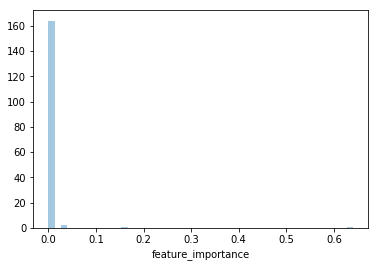

In [79]:
sns.distplot(feature_importances['feature_importance'], kde=False)

###### Looks like almost all of these features are worthless!

In [83]:
# Return the most important features 
most_important = feature_importances.loc[feature_importances['feature_importance'] >= 0.01]

X_final = y2015[list(most_important['feature'])]
Y_final = y2015['loan_status']
X_final.head()

,loan_amnt,funded_amnt_inv,out_prncp_inv,total_rec_prncp
0,16000.0,16000.0,13668.88,2331.12
1,9600.0,9600.0,6635.69,2964.31
2,25000.0,25000.0,0.00,25000.00
3,28000.0,28000.0,19263.77,8736.23
4,8650.0,8650.0,0.00,8650.00


###### Let's re-run the model with only these features.

In [85]:
rfc_final = ensemble.RandomForestClassifier()
cross_val_score(rfc_final, X_final, Y_final, cv=10)

array([ 0.88273848,  0.94374391,  0.92840351,  0.95276769,  0.94946569,
        0.94298266,  0.91795103,  0.92794889,  0.94236113,  0.94677718])

###### MUCH better. Next time I'll know to check out feature importance from an individual tree before I start really digging deep in other ways. It was a lot faster than PCA!